### SEABORN COUNTPLOT
seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
pokemon = pd.read_csv('./pokemon.csv')
print(pokemon.shape)
print(pokemon.head(10))

(807, 14)
   id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   
5   6   charizard              1     1.7    90.5              240   fire   
6   7    squirtle              1     0.5     9.0               63  water   
7   8   wartortle              1     1.0    22.5              142  water   
8   9   blastoise              1     1.6    85.5              239  water   
9  10    caterpie              1     0.3     2.9               39    bug   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  pois

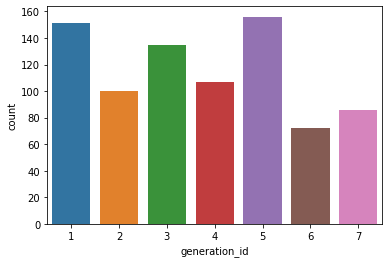

In [3]:
sb.countplot(data = pokemon, x = 'generation_id');

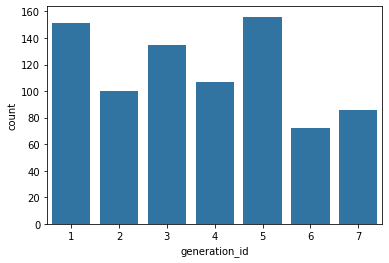

In [4]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

### MATPLOTLIB BAR
matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None)

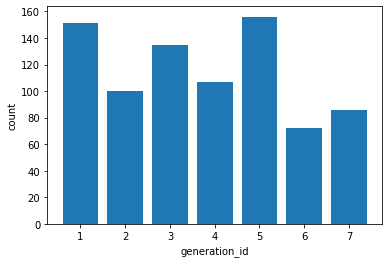

In [5]:
x = pokemon['generation_id'].unique()
y = pokemon['generation_id'].value_counts(sort = False)
plt.bar(x, y)
plt.xlabel('generation_id')
plt.ylabel('count')
plt.show()

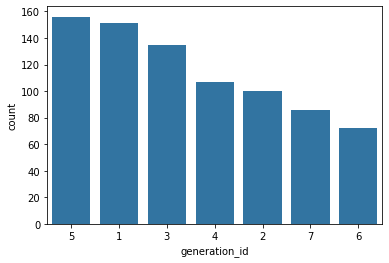

In [6]:
# Statically order the bars in the barchart
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = [5, 1, 3, 4, 2, 7, 6]);

# Dynamically order bars in the barchart
freq = pokemon['generation_id'].value_counts()
gen_order = freq.index
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order);

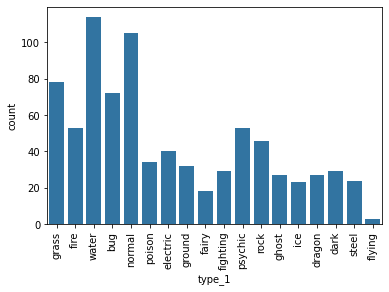

In [7]:
# Rotate category labels
sb.countplot(data = pokemon, x = 'type_1', color = base_color);
plt.xticks(rotation = 90);

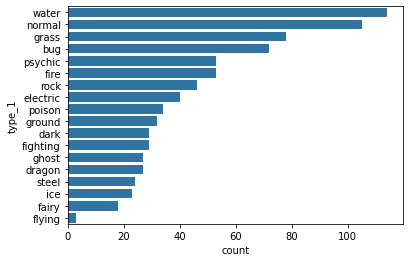

In [8]:
# Rotate the axes for horizontal barchart
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order);

### ABSOLUTE VS. RELATIVE FREQUENCY

#### MELT
Data-wrangling function to unpivot the DataFrame:<br>
DataFrame.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)

#### ABSOLUTE FREQUENCY

In [9]:
# Melt the dataframe
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name = 'type_level',
                          value_name = 'type')
print(pkmn_types.head(10))

   id     species type_level   type
0   1   bulbasaur     type_1  grass
1   2     ivysaur     type_1  grass
2   3    venusaur     type_1  grass
3   4  charmander     type_1   fire
4   5  charmeleon     type_1   fire
5   6   charizard     type_1   fire
6   7    squirtle     type_1  water
7   8   wartortle     type_1  water
8   9   blastoise     type_1  water
9  10    caterpie     type_1    bug


In [10]:
# Count frequency of occurrance of 'type' value
type_counts = pkmn_types['type'].value_counts()
print(type_counts)

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64


In [11]:
# Get unique values of 'type' in decreasing frequency
type_order = type_counts.index
print(type_order)

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')


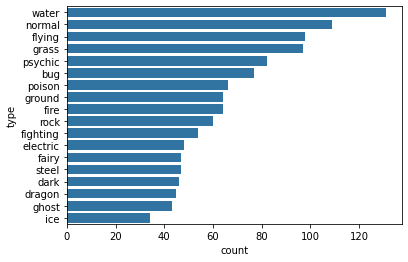

In [12]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

#### RELATIVE FREQUENCY

In [13]:
# Return sum of all non-NaN values
n_pokemon = pkmn_types['type'].value_counts().sum()

# Return the highest frequency of 'types'
max_type_count = type_counts[0]

# Return the maximum proportion of the highst frequency 'type'
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [14]:
# Create an array of evenly spaced proportioned values
tick_props = np.arange(0, max_prop, .02)
print(tick_props)

[0.   0.02 0.04 0.06 0.08 0.1 ]


In [15]:
# Create a list of string values representing the numerical list
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
print(tick_names)

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']


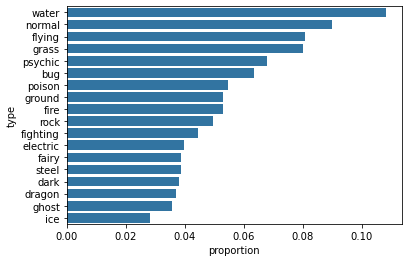

In [16]:
# Create plot and modify tick locations and labels
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

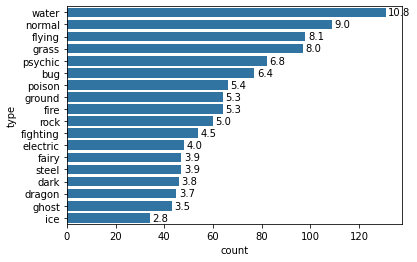

In [17]:
# Print text on bars of plot
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_str = '{:0.1f}'.format(100 * count / n_pokemon)
    plt.text(count + 1, i, pct_str, va = 'center')

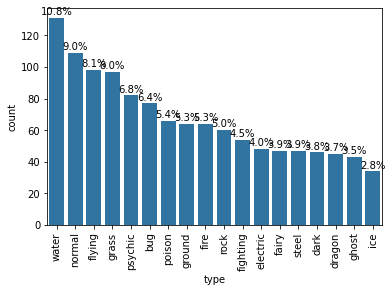

In [18]:
# Print text below bars of vertical plot
sb.countplot(data = pkmn_types, x = 'type', color = base_color, order = type_order);

# Get current tick location and labels
locs, labels = plt.xticks(rotation = 90)

#Loop through each pair of loc/labels
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_str = '{:0.1f}%'.format(100 * count / n_pokemon)
    plt.text(loc, count + 2, pct_str, ha = 'center', color = 'black')

In [19]:
# Resize the plot
from matplotlib import rcParams

# Specify size in inches for x, y axes
rcParams['figure.figsize'] = 12, 4

### COUNTING MISSING DATA
pandas.DataFrame.isna()<br>
pandas.DataFrame.isnull()

In [20]:
sales = pd.read_csv('./sales_data.csv')
print(sales.head(10))

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   
5      1  12/03/2010        57.79       2.667        NaN        NaN   
6      1  19/03/2010        54.58       2.720        NaN        NaN   
7      1  26/03/2010        51.45       2.732        NaN        NaN   
8      1  02/04/2010        62.27       2.719        NaN        NaN   
9      1  09/04/2010        65.86       2.770        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       Tru

In [21]:
print(sales.shape)

(8190, 12)


In [23]:
print(sales.isnull())

      Store   Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0     False  False        False       False       True       True       True   
1     False  False        False       False       True       True       True   
2     False  False        False       False       True       True       True   
3     False  False        False       False       True       True       True   
4     False  False        False       False       True       True       True   
...     ...    ...          ...         ...        ...        ...        ...   
8185  False  False        False       False      False      False      False   
8186  False  False        False       False      False      False      False   
8187  False  False        False       False      False      False      False   
8188  False  False        False       False      False      False      False   
8189  False  False        False       False      False      False      False   

      MarkDown4  MarkDown5    CPI  Unem

In [24]:
print(sales.isnull().sum())

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [26]:
# Drop columns that contain no missing data
na_counts = sales.drop(['Date', 'Temperature', 'Fuel_Price'], axis = 1).isnull().sum()
print(na_counts)

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


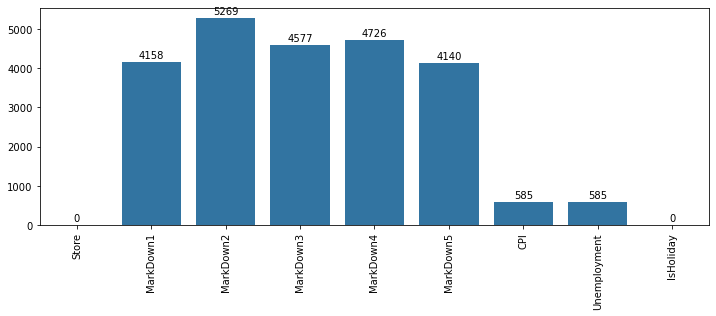

In [28]:
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 90)
for i in range(na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count + 300, count, ha = 'center', va = 'top')